In [8]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data getting, cleaning, and exploring
import wrangle as w
import evaluate as ev
import explore as ex

# Python without these is hard
import pandas as pd
import numpy as np
from pydataset import data
from scipy import stats

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.impute import SimpleImputer
# Regression Modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
# df = w.get_zillow_data(cached=True)

In [13]:
df = w.wrangle_zillow()

KeyboardInterrupt: 

In [4]:
# df.shape

In [5]:
# df.parcelid.nunique()

In [6]:
# df = df[df.latitude.notnull()]

In [7]:
# df = df[df.longitude.notnull()]

In [104]:
ex.missing_zero_values_table(df)

Your selected dataframe has 21 columns and 71525 Rows.
There are 0 columns that have NULL values.


,Zero Values,NULL Values,% of Total NULL Values,Total Zero's plus NULL Values,% Total Zero's plus NULL Values,Data Type
parcelid,0,0,0.0,0,0.0,int64
region_id_county,0,0,0.0,0,0.0,float64
log_error,0,0,0.0,0,0.0,float64
tax_amount,0,0,0.0,0,0.0,float64
land_tax_value,0,0,0.0,0,0.0,float64
assessment_year,0,0,0.0,0,0.0,float64
tax_value,0,0,0.0,0,0.0,float64
struct_tax_value,0,0,0.0,0,0.0,float64
year_built,0,0,0.0,0,0.0,float64
unitcnt,0,0,0.0,0,0.0,float64


In [9]:
# missing_cols_df = pd.Series(data=df.isnull().sum(axis = 1).value_counts().sort_index(ascending=False))

In [10]:
# missing_cols_df = pd.DataFrame(missing_cols_df)

In [11]:
# missing_cols_df = missing_cols_df.reset_index()

In [12]:
# missing_cols_df.columns = ['total_missing_cols','num_rows']

In [13]:
# missing_cols_df['percent_cols_missing'] = round(100 * missing_cols_df.total_missing_cols / df.shape[1], 2)

In [14]:
# missing_cols_df.head()

In [15]:
# ex.missing_columns(df)

In [16]:
# df.propertylandusetypeid.value_counts().sort_index()

### propertylandusetypeid code meanings:
- <span style="color:red">red</span>: means that there are properties of this type in dataframe and are not "single unit properties"
- <span style="color:green">green</span>: are properties that are accepted as "single unit properties"
- ~~strikeout~~: are property types that are not included in the dataframe

    - <span style="color:red">31	Commercial/Office/Residential Mixed Used</span>
    - ~~46	Multi-Story Store~~
    - ~~47	Store/Office (Mixed Use)~~
    - <span style="color:red">246	Duplex (2 Units, Any Combination)</span>
    - <span style="color:red">247	Triplex (3 Units, Any Combination)</span>
    - <span style="color:red">248	Quadruplex (4 Units, Any Combination)</span>
    - <span style="color:green">260	Residential General</span>
    - <span style="color:green">261	Single Family Residential</span>
    - ~~<span style="color:green">262	Rural Residence</span>~~
    - <span style="color:green">263	Mobile Home</span>
    - <span style="color:green">264	Townhouse</span>
    - <span style="color:green">265	Cluster Home</span>
    - <span style="color:green">266	Condominium</span>
    - <span style="color:green">267	Cooperative</span>
    - ~~<span style="color:green">268	Row House</span>~~
    - <span style="color:red">269	Planned Unit Development</span>
    - ~~270	Residential Common Area~~
    - ~~271	Timeshare~~
    - ~~<span style="color:green">273	Bungalow</span>~~
    - ~~274	Zero Lot Line~~
    - <span style="color:green">275	Manufactured, Modular, Prefabricated Homes</span>
    - ~~<span style="color:green">276	Patio Home</span>~~
    - ~~<span style="color:green">279	Inferred Single Family Residential</span>~~
    - ~~290	Vacant Land - General~~
    - ~~291	Residential Vacant Land~~

In [17]:
# df.propertylandusetypeid = df.propertylandusetypeid.astype(int)

In [18]:
# # gave 'propertylandusetypeid' to variable x for ease, dropping propertylandusetypeid's that are not single unit properties
# x='propertylandusetypeid'
# df = df[df[x] != 31]
# df = df[df[x] != 246]
# df = df[df[x] != 247]
# df = df[df[x] != 248]
# df = df[df[x] != 269]

In [19]:
# df.shape[0]

In [20]:
# df.propertylandusetypeid.value_counts().sort_index()

In [21]:
# df.unitcnt.value_counts()

In [22]:
# df.unitcnt.isnull().sum()

In [23]:
# fill unitcnt with 1 because these properties should be single unit properties

# df.unitcnt.fillna(1, inplace=True)

In [24]:
# df.unitcnt.isnull().sum()

In [25]:
# df.unitcnt.value_counts()

In [26]:
# drop any property listed less than or greater than 1 

# df = df[df.unitcnt == 1]

In [27]:
# df.unitcnt.value_counts()

In [28]:
# df.shape

In [29]:
# df = w.handle_missing_values(df, 0.6, 0.75)
# df.shape

In [30]:
# df.isnull().sum().sort_values(ascending=False)

In [31]:
# dropcols = ['id','heatingorsystemtypeid','buildingqualitytypeid','propertyzoningdesc','heatingorsystemdesc','calculatedbathnbr','regionidzip','regionidcity']

In [32]:
# df = df.drop(columns=dropcols)

In [33]:
# df[df.taxamount.isnull()]

In [34]:
# df[df.taxvaluedollarcnt.isnull()]

In [35]:
# df = df[df.taxvaluedollarcnt.notnull()]

In [36]:
# df.isnull().sum().sort_values(ascending=False)

In [37]:
# df.structuretaxvaluedollarcnt.mean()

In [38]:
# df.landtaxvaluedollarcnt.mean()

In [39]:
# df.taxvaluedollarcnt.mean()

In [40]:
# df.structuretaxvaluedollarcnt.mean() / df.landtaxvaluedollarcnt.mean()

In [41]:
# df[df.structuretaxvaluedollarcnt.isnull()]

### taxvaluedollarcnt = structuretaxvaluedollarcnt + landtaxvaluedollarcnt...  
- dropping values b/c
    - target feature if taxvaluedollarcnt and these values influence the target. 83 structure nulls
    - taxamount will be dropped as well. 5 taxamount nulls
    - so few values I am comfortable dropping

In [42]:
# df = df[df.structuretaxvaluedollarcnt.notnull()]
# df.shape

In [43]:
# df = df[df.taxamount.notnull()]
# df.shape

In [44]:
# df.yearbuilt.describe()


In [45]:
# knn b/c close neighborhoods go up at similar dates
# will use yearbuilt, lat, long, fips
# df.fips = df.fips.astype(int)
# df.fips.dtype

In [46]:
# df.isnull().sum()

In [47]:
# from sklearn.impute import KNNImputer

# #Use numeric columns that you want to use for imputation
# knn_cols_df = df[['yearbuilt','latitude','longitude','fips']]
# features = ['yearbuilt','latitude','longitude','fips']
# # define the thing
# imputer = KNNImputer(n_neighbors=4)

# # fit the thing (or fit and use with fit_transform) only on train!
# imputed = imputer.fit_transform(knn_cols_df)
# imputed

In [48]:
# imputed = pd.DataFrame(imputed, index = df.index, dtype=int)
# imputed.head()

In [49]:
# df['yearbuilt'] = imputed[[0]]

In [50]:
# df = w.impute_knn(df, features, 4)

In [51]:
# df.isnull().sum()

In [52]:
# df.lotsizesquarefeet.describe()

In [53]:
# #Use numeric columns that you want to use for imputation
# knn_cols_df = df[['lotsizesquarefeet','latitude','longitude','fips','calculatedfinishedsquarefeet']]
# features = ['lotsizesquarefeet','latitude','longitude','fips','calculatedfinishedsquarefeet']
# # define the thing
# imputer = KNNImputer(n_neighbors=4)

# # fit the thing (or fit and use with fit_transform) only on train!
# imputed = imputer.fit_transform(knn_cols_df)
# imputed

In [54]:
# imputed = pd.DataFrame(imputed, index = df.index, dtype=int)
# imputed.head()

In [55]:
# df['lotsizesquarefeet'] = imputed[[0]]

In [56]:
# df = w.impute_knn(df, features, 4)

In [57]:
# df = df[df.calculatedfinishedsquarefeet.notnull()]

In [58]:
# df.isnull().sum()

In [59]:
# dropcols = ['finishedsquarefeet12','fullbathcnt','censustractandblock','roomcnt']

In [60]:
# df = df.drop(columns=dropcols)

In [61]:
# df = df[df.bedroomcnt != 0]
# df = df[df.bathroomcnt != 0]

In [62]:
# ex.missing_zero_values_table(df)

In [ ]:
# df = pd.get_dummies(df, columns=['fips'], drop_first=True)

In [ ]:
# df['log_error_class'] = pd.qcut(df.log_error, q=4, labels=['s1', 's2', 's3', 's4'])

In [111]:
list(df.columns)

['parcelid',
 'bathrooms',
 'bedrooms',
 'property_sqft',
 'fips',
 'latitude',
 'longitude',
 'lot_sqft',
 'prop_cnty_land_code',
 'prop_land_type_id',
 'census_tract_and_block',
 'region_id_county',
 'unitcnt',
 'year_built',
 'struct_tax_value',
 'tax_value',
 'assessment_year',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'transaction_date']

In [64]:
# df.columns = ['parcelid', 'bathrooms', 'bedrooms', 'property_sqft', 'fips', 'latitude', 'longitude', 'lot_sqft', 'prop_cnty_land_code', 'prop_land_type_id', 'census_tract_and_block', 'region_id_county', 'unitcnt', 'year_built', 'struct_tax_value', 'tax_value', 'assessment_year', 'land_tax_value', 'tax_amount', 'log_error', 'transaction_date']

In [112]:
cat_vars = ['fips',
 'prop_cnty_land_code',
 'prop_land_type_id',
 'region_id_county']
quant_vars = ['bathrooms',
 'bedrooms',
 'property_sqft',
 'latitude',
 'longitude',
 'lot_sqft',
 'census_tract_and_block',
 'unitcnt',
 'year_built',
 'struct_tax_value',
 'tax_value',
 'assessment_year',
 'land_tax_value',
 'tax_amount',
 'log_error',
 'transaction_date']

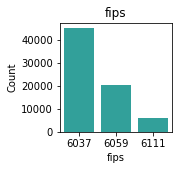

      fips  Count  Percent
6037  6037  45178    63.16
6059  6059  20243    28.30
6111  6111   6104     8.53
_________________________________________________________________


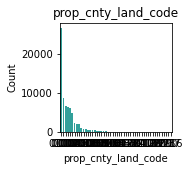

     prop_cnty_land_code  Count  Percent
0100                0101  26609    37.20
010C                0100   8692    12.15
122                 01DC   6740     9.42
0101                0104   6380     8.92
122                 010C   6264     8.76
34                  012C   4887     6.83
1111                0103   2260     3.16
1                   010E   2018     2.82
010E                0700   1933     2.70
1111                070D   1087     1.52
1129                0102    831     1.16
1110                0108    619     0.87
1129                010H    547     0.76
1110                012E    384     0.54
012C                010V    383     0.54
0104                010F    366     0.51
1                   0109    334     0.47
1128                010M    214     0.30
01DC                0131    210     0.29
01HC                0130    135     0.19
1128                0105    119     0.17
0103                0110     90     0.13
010G                0111     75     0.10
010H            

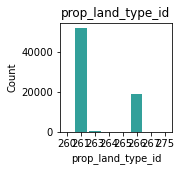

     prop_land_type_id  Count  Percent
261                261  52061    72.79
266                266  18994    26.56
265                263    333     0.47
263                264     59     0.08
275                260     35     0.05
267                267     29     0.04
260                265      8     0.01
264                275      6     0.01
_________________________________________________________________


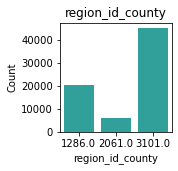

        region_id_county  Count  Percent
3101.0            3101.0  45178    63.16
1286.0            1286.0  20243    28.30
2061.0            2061.0   6104     8.53
_________________________________________________________________


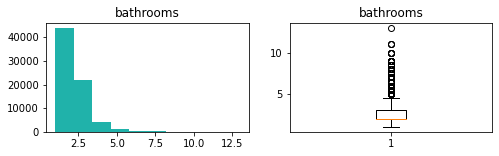

count    71525.000000
mean         2.270654
std          0.941874
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bathrooms, dtype: float64


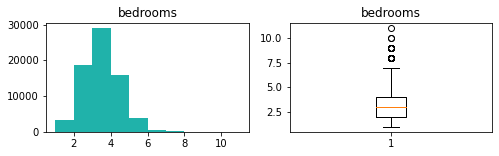

count    71525.000000
mean         3.016777
std          1.003892
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


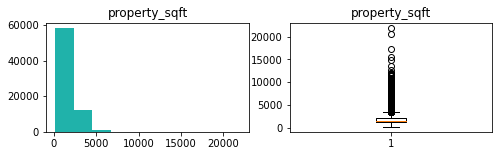

count    71525.000000
mean      1751.998168
std        927.788140
min        152.000000
25%       1166.000000
50%       1512.000000
75%       2064.000000
max      21929.000000
Name: property_sqft, dtype: float64


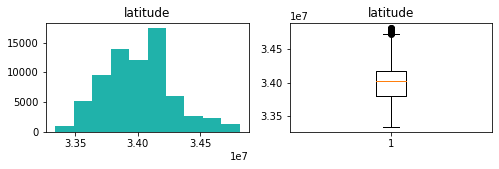

count    7.152500e+04
mean     3.400564e+07
std      2.696072e+05
min      3.333953e+07
25%      3.380540e+07
50%      3.401872e+07
75%      3.417765e+07
max      3.481877e+07
Name: latitude, dtype: float64


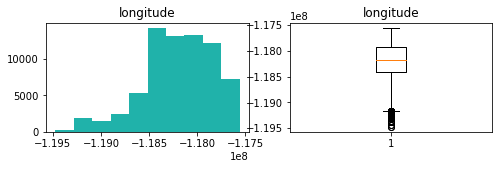

count    7.152500e+04
mean    -1.181987e+08
std      3.654758e+05
min     -1.194754e+08
25%     -1.184180e+08
50%     -1.181683e+08
75%     -1.179156e+08
max     -1.175546e+08
Name: longitude, dtype: float64


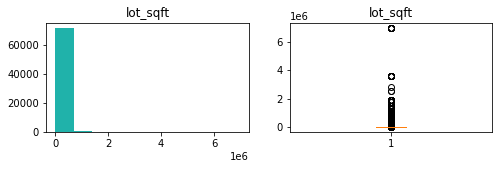

count    7.152500e+04
mean     2.849199e+04
std      1.202060e+05
min      2.360000e+02
25%      5.542000e+03
50%      7.150000e+03
75%      1.132100e+04
max      6.971010e+06
Name: lot_sqft, dtype: float64


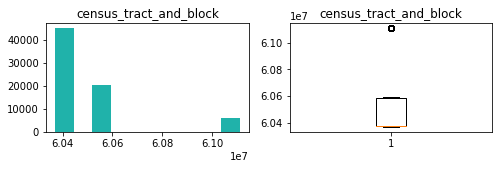

count    7.152500e+04
mean     6.049842e+07
std      2.098451e+05
min      6.037101e+07
25%      6.037400e+07
50%      6.037621e+07
75%      6.059052e+07
max      6.111009e+07
Name: census_tract_and_block, dtype: float64


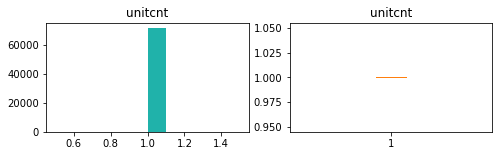

count    71525.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: unitcnt, dtype: float64


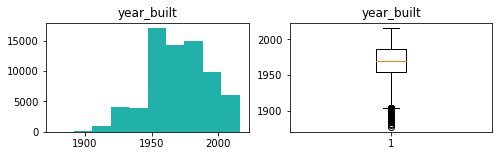

count    71525.000000
mean      1969.361492
std         23.042268
min       1878.000000
25%       1954.000000
50%       1970.000000
75%       1987.000000
max       2016.000000
Name: year_built, dtype: float64


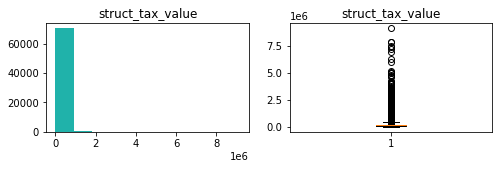

count    7.152500e+04
mean     1.877392e+05
std      2.265514e+05
min      4.400000e+01
25%      8.358300e+04
50%      1.348870e+05
75%      2.160000e+05
max      9.164901e+06
Name: struct_tax_value, dtype: float64


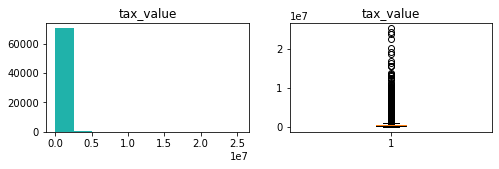

count    7.152500e+04
mean     4.871847e+05
std      6.291532e+05
min      3.254000e+03
25%      2.047930e+05
50%      3.562190e+05
75%      5.665040e+05
max      2.538125e+07
Name: tax_value, dtype: float64


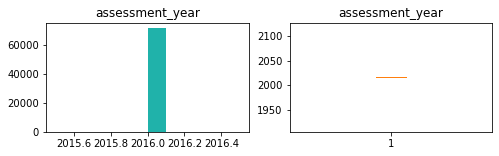

count    71525.0
mean      2016.0
std          0.0
min       2016.0
25%       2016.0
50%       2016.0
75%       2016.0
max       2016.0
Name: assessment_year, dtype: float64


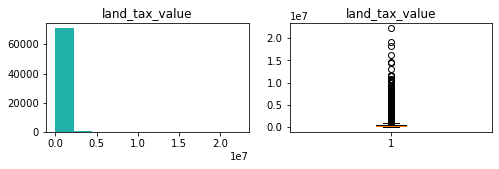

count    7.152500e+04
mean     2.994455e+05
std      4.578541e+05
min      1.610000e+02
25%      8.361900e+04
50%      2.033950e+05
75%      3.670350e+05
max      2.233550e+07
Name: land_tax_value, dtype: float64


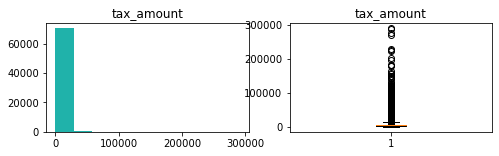

count     71525.000000
mean       5937.749499
std        7308.828790
min          19.920000
25%        2682.820000
50%        4400.180000
75%        6842.060000
max      290998.060000
Name: tax_amount, dtype: float64


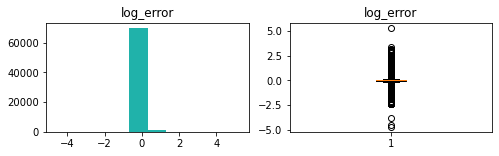

count    71525.000000
mean         0.017109
std          0.166373
min         -4.655420
25%         -0.023405
50%          0.006755
75%          0.038542
max          5.262999
Name: log_error, dtype: float64


TypeError: unsupported operand type(s) for /: 'str' and 'int'

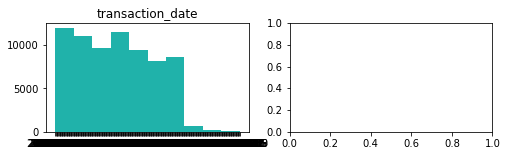

In [113]:
ex.explore_univariate(df, cat_vars, quant_vars)

# Mall Customers database

In [90]:
# df = w.get_mall_data(cached=True)

In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [67]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [69]:
outlier_df = ex.add_upper_outlier_columns(df, 1.5)

In [70]:
outlier_df.head()

,customer_id,gender,age,annual_income,spending_score,customer_id_outliers,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0,0,0.0,0
1,2,Male,21,15,81,0,0,0.0,0
2,3,Female,20,16,6,0,0,0.0,0
3,4,Female,23,16,77,0,0,0.0,0
4,5,Female,31,17,40,0,0,0.0,0


In [80]:
outlier_df.drop(columns=['customer_id_outliers'])

,customer_id,gender,age,annual_income,spending_score,age_outliers,annual_income_outliers,spending_score_outliers
0,1,Male,19,15,39,0,0.00,0
1,2,Male,21,15,81,0,0.00,0
2,3,Female,20,16,6,0,0.00,0
3,4,Female,23,16,77,0,0.00,0
4,5,Female,31,17,40,0,0.00,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,0.00,0
196,197,Female,45,126,28,0,0.00,0
197,198,Male,32,126,74,0,0.00,0
198,199,Male,32,137,18,0,4.25,0


In [98]:
df[df.annual_income > 100]

,customer_id,gender,age,annual_income,spending_score
186,187,Female,54,101,24
187,188,Male,28,101,68
188,189,Female,41,103,17
189,190,Female,36,103,85
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79


In [72]:
# df = w.remove_outliers(df, 'annual_income', 1.5)

In [73]:
# df = pd.get_dummies(df, columns=['gender'], drop_first=True)

In [74]:
# df.head()

In [75]:
# train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = w.train_validate_test_split(df, 'annual_income', 42)

In [76]:
# object_cols = w.get_object_cols(X_train)
# numeric_cols = w.get_numeric_X_cols(X_train, object_cols)

In [77]:
# X_train_scaled, X_validate_scaled, X_test_scaled = w.min_max_scale(X_train, X_validate, X_test, numeric_cols)

In [78]:
# train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test, X_train_scaled, X_validate_scaled, X_test_scaled = w.wrangle_mall()
